Import the libraries

In [3]:
#Import the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
#load the data
df = pd.read_csv(r"C:\Users\layin\OneDrive\Desktop\Amazon\Amazon_Bestselling_Reads-\data\bestsellers with categories.csv", sep = ",")

In [5]:
df.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [6]:
#datatypes
df.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [8]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


This identify the maximum reviews as 87841, user rating as .9 , price  as $105 and the year to be 2019 while the minimum prating was 3.3

Data cleaning and description

In [9]:
df.shape

(550, 7)

In [10]:
# identify the missing values
df. isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

no missing value in any of the columns.

len(df.Name)

In [11]:
#to determine  the number of unique books
len(df.Name.unique())

351

In [12]:
#To check/list number variable type
num_variables = df.dtypes[df.dtypes != 'object'].index.tolist()

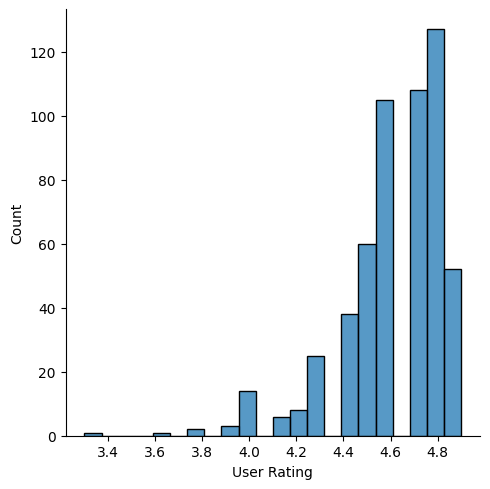

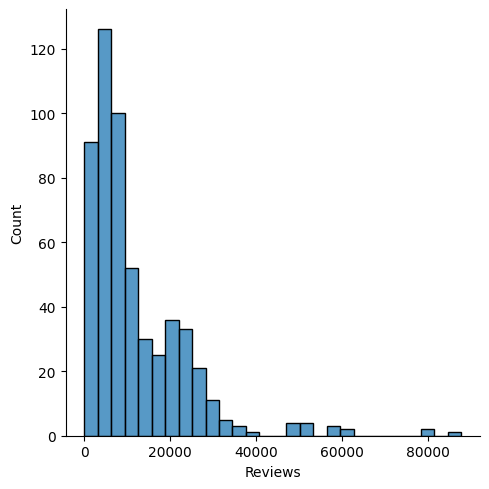

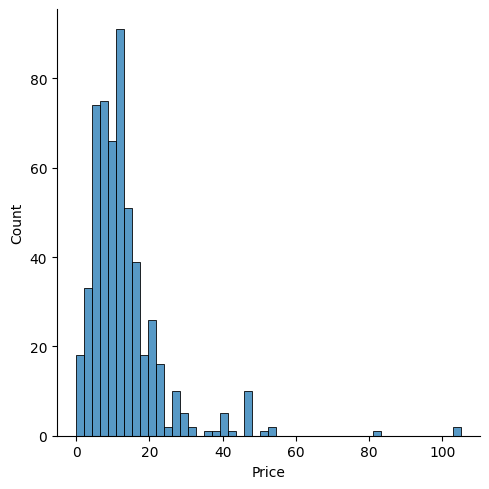

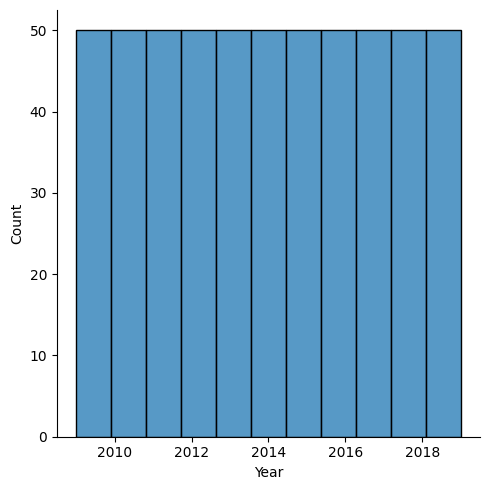

In [13]:
#displot to show distribution of the numerical variables
for column in num_variables:
    sns.displot(df[column])

Does the price of the books affect the user ratings? yes

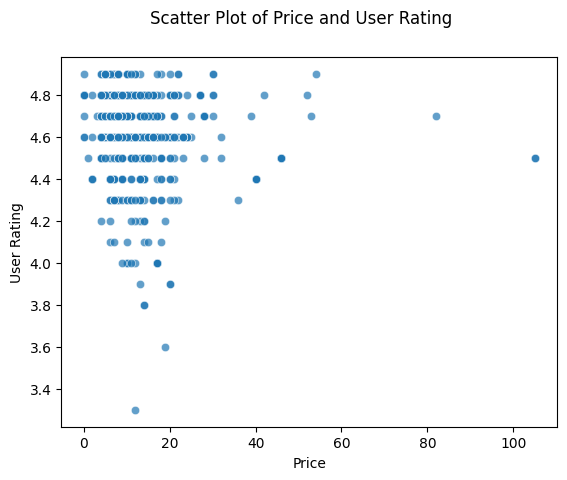

In [14]:
#scattered plots to show correlation/ relationship between the price  and User Rating
import matplotlib.pyplot as plt
sns.scatterplot(data=df, 
                x="Price", 
                y="User Rating",
                alpha = 0.7)
plt.suptitle("Scatter Plot of Price and User Rating")
plt.show()

Text(0.5, 28.999999999999986, 'Price')

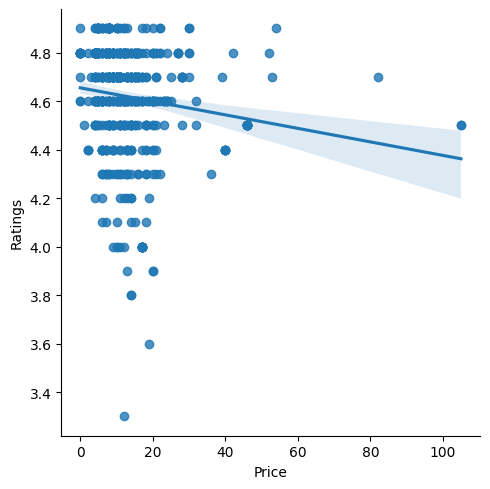

In [15]:
sns.lmplot(y='User Rating',x='Price',data=df)
plt.ylabel('Ratings')
plt.xlabel('Price')

Rating is affected by the price as it is evident that as price increases, ratings decreases.

In [16]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_columns.corr()


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

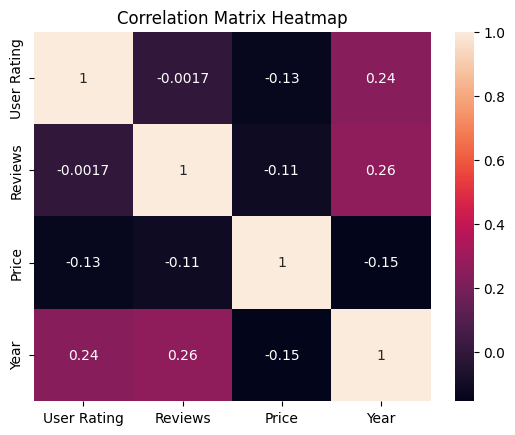

In [17]:
#Heatmap showing correlation in different variables.
# Create a heat map with correlation data
sns.heatmap(data= corr, annot=True)
plt.title("Correlation Matrix Heatmap")

what is the category of the books in the genre and there values.

In [18]:
# show the type of Genre in the dataframe.
genre_no=df.Genre.value_counts()
genre_no

Genre
Non Fiction    310
Fiction        240
Name: count, dtype: int64

This indicate that 310 are  non fiction while 240 are fiction.

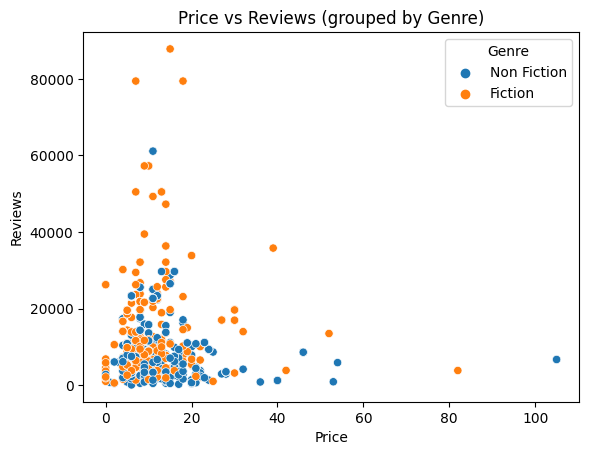

In [19]:
# Scatter plot of "Grocery" vs. "Milk" grouped by Frozen
sns.scatterplot(data=df, x='Price', y='Reviews', hue='Genre')
plt.xlabel('Price')
plt.ylabel('Reviews')
plt.title('Price vs Reviews (grouped by Genre)')
plt.show()

<Figure size 600x400 with 0 Axes>

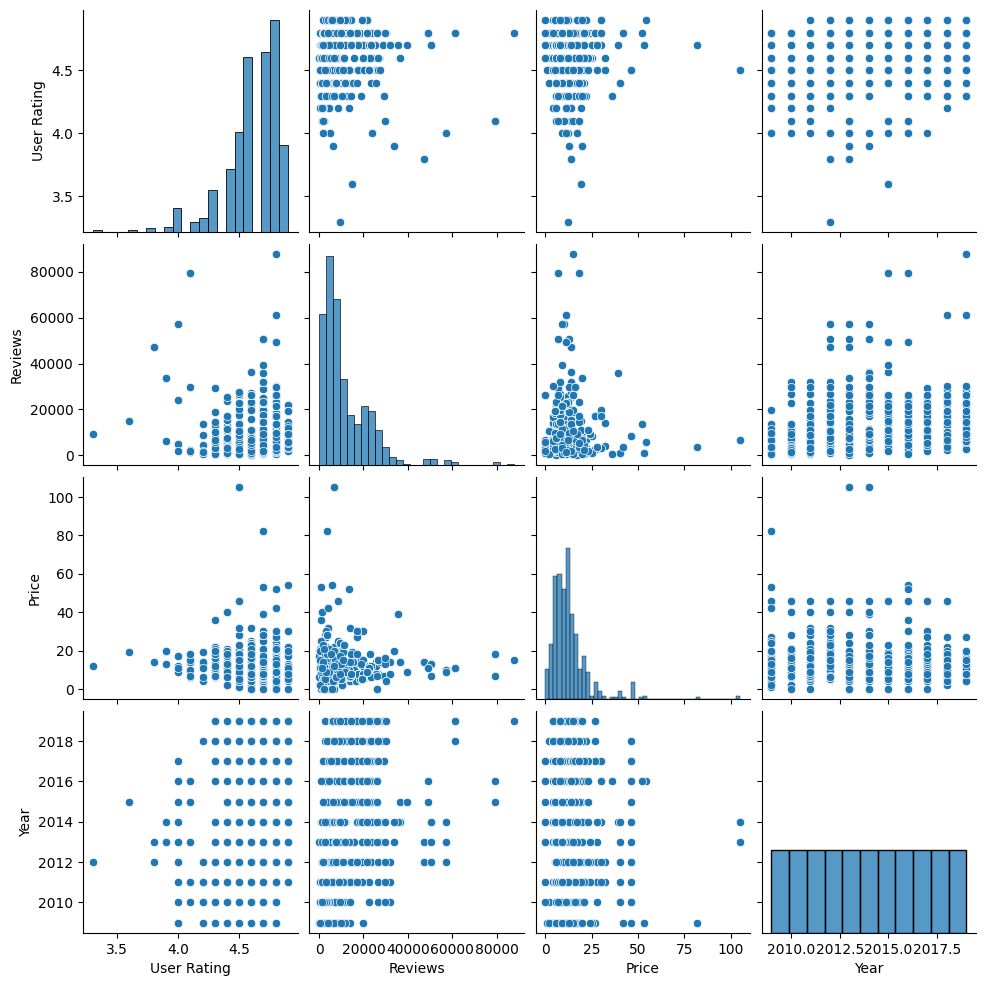

In [20]:
import matplotlib.pyplot as plt
#Pairplot comparing many distributions at the same time.
plt.figure(figsize=(6, 4))
# Selecting numerical columns
numeric_col = df.select_dtypes(include='number')
# To create pair plots for numerical columns
sns.pairplot(numeric_col)
plt.show()

what is the year with the highest review and what category of genre was reviewed most?

Text(0.5, 1.0, 'yearly reviews')

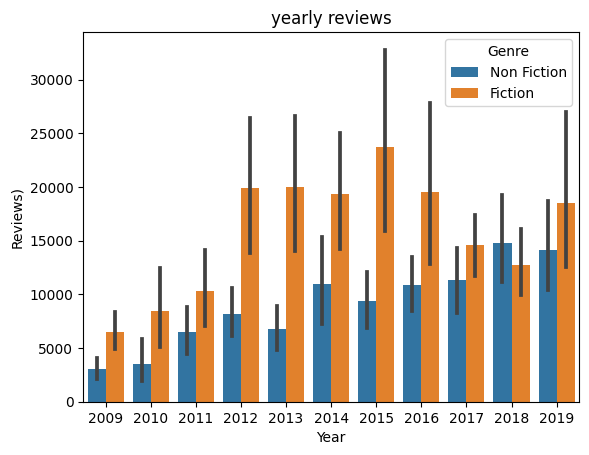

In [21]:
#sns.histplot(ax=ax1, data=data, x=data["User Rating"], hue="Genre")
#sns.boxenplot(ax=ax2, data=data, x = data["Year"], y=data["User Rating"])
#sns.histplot(ax=ax3,  data=data, x=data["Price"],  kde=True, linewidth=0)
#sns.lineplot(ax=ax4, data=data, x = data["Year"], y=data["User Rating"], hue="Genre")
sns.barplot(data=df, x = df["Year"], y=df["Reviews"], hue="Genre")
plt.xlabel('Year')
plt.ylabel("Reviews)")
plt. title('yearly reviews')

The year with the highest review was  year 2015 and the Non Fiction books hane the highest review.

Text(0.5, 1.0, 'Rating by Genre')

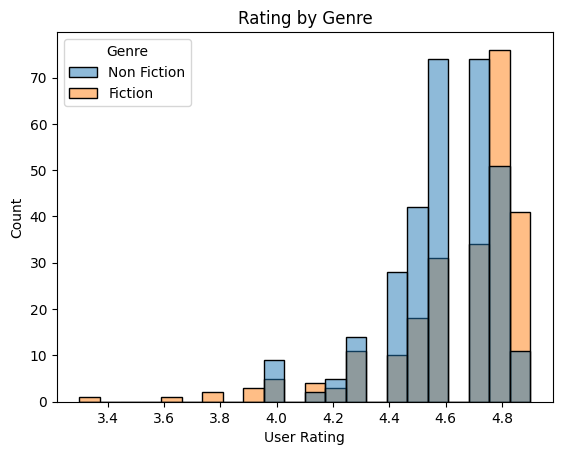

In [22]:
sns.histplot(data=df, x=df["User Rating"], hue="Genre")
plt.xlabel('User Rating')
plt. title('Rating by Genre')

Text(0.5, 1.0, 'User Rating per year grouped by Genre')

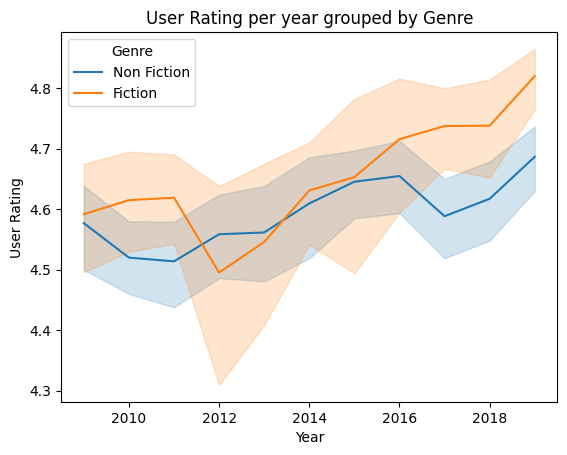

In [23]:
sns.lineplot(data=df, x = df["Year"], y=df["User Rating"], hue="Genre")
plt. title('User Rating per year grouped by Genre')

User rating  for fiction books was the lowest in 2012 while its rating was highest in 2018 and 2019. We can conclude that  it is an advent of Fiction books, they are bestsellers these days.

Identify the 15 Best selling  Amazon books  between 2009-2019?

Feature engineering

In [26]:
# This involves adding another column to give an assumed profit made on each book.
#Assumed_value = Reviews * Price
df['Assumed_profit']= df.Reviews*df.Price

In [27]:
df

,Name,Author,User Rating,Reviews,Price,Year,Genre,Assumed_profit
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,138800
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,45144
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,284685
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,128544
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,91980
...,...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction,75304
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction,114648
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction,114648
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction,114648


In [28]:
Bestseller_df = df.groupby('Name')['Assumed_profit'].max()
Bestseller_df=Bestseller_df.sort_values(ascending=False).head(15)
Bestseller_df

Name
The Girl on the Train                                                                                 1430028
The Alchemist                                                                                         1396161
Where the Crawdads Sing                                                                               1317615
Diagnostic and Statistical Manual of Mental Disorders, 5th Edition: DSM-5                              701295
Harry Potter Paperback Box Set (Books 1-7)                                                             700492
The Goldfinch: A Novel (Pulitzer Prize for Fiction)                                                    676880
Becoming                                                                                               672463
Fifty Shades of Grey: Book One of the Fifty Shades Trilogy (Fifty Shades of Grey Series)               661710
The Fault in Our Stars                                                                                 656266
A Gam

Text(0.5, 1.0, 'Revenue generated by Books')

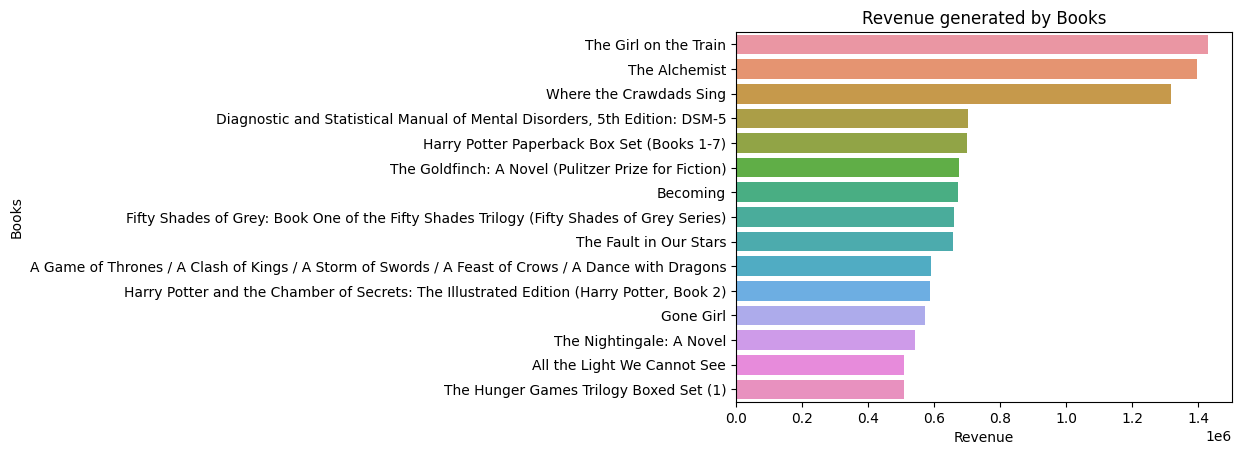

In [36]:
ax= sns.barplot(x=Bestseller_df, y=Bestseller_df.index)
plt.xlabel("Revenue")
plt.ylabel("Books")
plt.title('Revenue generated by Books')

who are the authors of these books?

In [37]:
Authors=df.groupby('Author')['Assumed_profit'].sum()

In [38]:
Authors=Authors.sort_values(ascending=False).head(15)
Authors

Author
American Psychological Association    3946800
Suzanne Collins                       3368646
E L James                             2517303
John Green                            2381609
Laura Hillenbrand                     2284821
Paula Hawkins                         1986150
Gillian Flynn                         1660859
Gary Chapman                          1516167
Dr. Seuss                             1423598
American Psychiatric Association      1402590
Paulo Coelho                          1396161
Wizards RPG Team                      1376190
Dale Carnegie                         1375055
J.K. Rowling                          1369874
Donna Tartt                           1353760
Name: Assumed_profit, dtype: int64

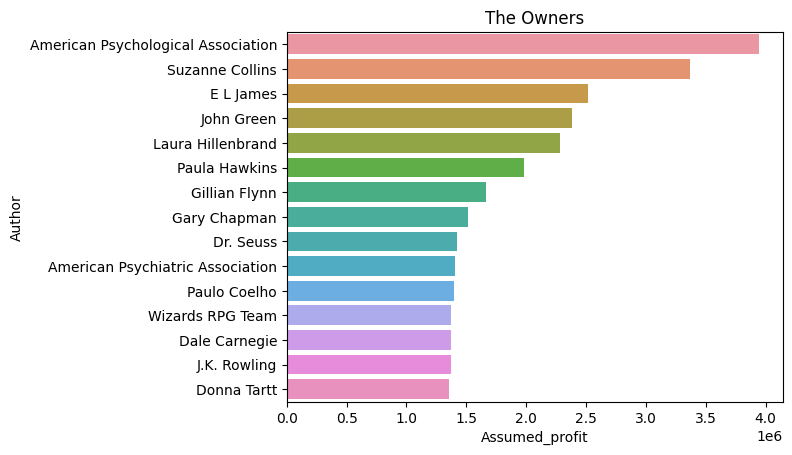

In [41]:
sns.barplot(y=Authors.index,x=Authors)
plt.title('The Owners');